# Preparación del entorno

In [1]:
import os
import pandas as pd

In [2]:
# Aquí se debe poner la carpeta de la computadora local
carpeta_local = "~/buckets/b1/"

# Establezco el Working Directory
os.chdir(os.path.expanduser(carpeta_local))

# Cargo el dataset
archivo_dataset = "./datasets/competencia_02.csv.gz"
dataset = pd.read_csv(archivo_dataset)


/tmp/ipykernel_32523/3353657052.py:9: DtypeWarning: Columns (154) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv(archivo_dataset)


# Prueba con SQL

In [3]:
%%bash
pip install --upgrade duckdb
pip install --upgrade jupysql
pip install --upgrade duckdb-engine

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [4]:
import duckdb
import pandas as pd

%load_ext sql
%config SqlMagic.autopandas = True
%config SqlMagic.feedback = False
%config SqlMagic.displaycon = False

%sql duckdb:///:default:

# Construcción de Clase_ternaria

In [5]:
%%sql
create or replace table competencia_02 as 
select 
    *
from read_csv_auto("./datasets/competencia_02.csv.gz")

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

,Success


In [6]:
%sql select * from competencia_02 limit 5

,numero_de_cliente,foto_mes,active_quarter,cliente_vip,internet,cliente_edad,cliente_antiguedad,mrentabilidad,mrentabilidad_annual,mcomisiones,...,Visa_fultimo_cierre,Visa_mpagado,Visa_mpagospesos,Visa_mpagosdolares,Visa_fechaalta,Visa_mconsumototal,Visa_cconsumos,Visa_cadelantosefectivo,Visa_mpagominimo,clase_ternaria
0,29183981,201901,1,0,1,48,171,8304.31,42993.54,2501.04,...,8,0.00,-35773.32,2.33,5148,36602.13,54,0,5008.71,CONTINUA
1,29184630,201901,1,0,1,57,296,18318.76,42597.26,14986.76,...,1,0.00,-67414.82,1149.57,3299,28503.06,10,0,1395.87,CONTINUA
2,29185587,201901,1,0,1,77,296,20862.84,85481.31,4228.40,...,1,0.00,0.00,0.00,6790,5170.25,2,0,0.00,CONTINUA
3,29185646,201901,1,0,1,58,231,25218.94,165317.78,4474.25,...,22,69653.59,-59422.00,0.00,7037,67991.90,31,0,2897.31,CONTINUA
4,29187499,201901,1,0,1,69,349,5307.54,32374.08,4706.22,...,8,0.00,-4802.21,0.00,7596,4851.93,3,0,492.66,CONTINUA


In [7]:
%%sql
select
    foto_mes
    , count(*) as cantidad -- cuenta cuantos casos hay en cada foto_mes
                           -- y lo guarda en un campo llamado cantidad
from competencia_02
group by foto_mes

,foto_mes,cantidad
0,201901,124864
1,201902,125898
2,201903,126536
3,201904,127059
4,201905,127683
5,201906,129181
6,201907,130551
7,201908,132615
8,201909,134267
9,201910,136515


# Descarga índice de inflación

## Armado del índice

In [8]:
!pip install pandas requests

Defaulting to user installation because normal site-packages is not writeable


In [9]:
import requests
from io import BytesIO

In [10]:
# URL del archivo
url = "https://www.indec.gob.ar/ftp/cuadros/economia/sh_ipc_08_23.xls"

# Descargar el archivo y cargar los datos de la hoja correcta
response = requests.get(url)
xls = pd.ExcelFile(BytesIO(response.content))

# Cargar los datos desde la hoja de interés
inflacion = pd.read_excel(xls, sheet_name="Índices IPC Cobertura Nacional", skiprows=5, usecols="B:CC")

In [11]:
inflacion

,2016-12-01,2017-01-01,2017-02-01,2017-03-01,2017-04-01,2017-05-01,2017-06-01,2017-07-01,2017-08-01,2017-09-01,...,2022-10-01,2022-11-01,2022-12-01,2023-01-01,2023-02-01,2023-03-01,2023-04-01,2023-05-01,2023-06-01,2023-07-01
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100,101.5859,103.6859,106.1476,108.9667,110.5301,111.8477,113.7852,115.3819,117.5719,...,1028.706,1079.2787,1134.5875,1202.979,1282.7091,1381.1601,1497.2147,1613.5895,1709.6115,1818.0838
4,100,101.3024,103.1605,106.0143,108.3515,109.7631,110.7483,112.0115,114.3467,116.4048,...,1096.5069,1135.001,1187.9252,1268.3385,1392.3999,1522.5337,1677.0441,1774.4119,1848.0332,1954.5101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# Transponer los datos y establecer la tercera fila como encabezado
inflacion = inflacion.transpose()


In [13]:
inflacion = inflacion[3]

In [14]:
inflacion

2016-12-01          100
2017-01-01     101.5859
2017-02-01     103.6859
2017-03-01     106.1476
2017-04-01     108.9667
                ...    
2023-03-01    1381.1601
2023-04-01    1497.2147
2023-05-01    1613.5895
2023-06-01    1709.6115
2023-07-01    1818.0838
Name: 3, Length: 80, dtype: object

In [15]:
# Pasar a data frame
import pandas as pd

inflacion = pd.DataFrame(inflacion)

In [16]:
inflacion.index.name='foto_mes'

In [17]:
inflacion

,3
foto_mes,
2016-12-01,100
2017-01-01,101.5859
2017-02-01,103.6859
2017-03-01,106.1476
2017-04-01,108.9667
...,...
2023-03-01,1381.1601
2023-04-01,1497.2147
2023-05-01,1613.5895


In [18]:
# Renombrar la columna
inflacion.columns = ["indice_inflacion"]

# Eliminar las filas con valores nulos
inflacion.dropna(inplace=True)

# Eliminar guiones y los últimos dos dígitos de la columna "foto_mes"
inflacion.index = inflacion.index.astype(str).str.replace('-', '').str[:-2]

# Mostrar las primeras filas del DataFrame resultante
inflacion.head()

,indice_inflacion
foto_mes,
201612,100
201701,101.5859
201702,103.6859
201703,106.1476
201704,108.9667


## Inflación A Sql

In [19]:
# Guardar el DataFrame como un archivo CSV
inflacion.to_csv('inflacion.csv')

In [20]:
%%sql
create or replace table inflacion as
select
    *
from read_csv_auto('inflacion.csv')

,Success


In [21]:
%%sql
select *
from inflacion

,foto_mes,indice_inflacion
0,201612,100.0000
1,201701,101.5859
2,201702,103.6859
3,201703,106.1476
4,201704,108.9667
...,...,...
75,202303,1381.1601
76,202304,1497.2147
77,202305,1613.5895
78,202306,1709.6115


Agrego inflación acumulada hasta 202107 para hacer el drifting

In [22]:
%%sql
ALTER TABLE inflacion
ADD COLUMN indice_inflacion_acumulada FLOAT; -- Adjust the data type as needed

WITH InflacionAcumulada AS (
    SELECT
        foto_mes,
        indice_inflacion,
        (
            (SELECT indice_inflacion FROM inflacion WHERE foto_mes = '202107') / indice_inflacion
        ) AS inflacion_acumulada
    FROM
        inflacion
)
UPDATE inflacion
SET indice_inflacion_acumulada = (SELECT inflacion_acumulada FROM InflacionAcumulada WHERE inflacion.foto_mes = InflacionAcumulada.foto_mes);


,Count
0,80


In [23]:
%%sql
select *
from inflacion

,foto_mes,indice_inflacion,indice_inflacion_acumulada
0,201612,100.0000,4.980987
1,201701,101.5859,4.903227
2,201702,103.6859,4.803919
3,201703,106.1476,4.692510
4,201704,108.9667,4.571109
...,...,...,...
75,202303,1381.1601,0.360638
76,202304,1497.2147,0.332684
77,202305,1613.5895,0.308690
78,202306,1709.6115,0.291352


# Inner join competencia_02 e inflación

In [24]:
%%sql
CREATE TABLE competencia_02_temp AS
SELECT
    *
FROM
    competencia_02 c2
INNER JOIN
    inflacion i
ON
    c2.foto_mes = i.foto_mes;

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

,Success


In [25]:
%%sql
-- Elimina la columna 'indice_inflacion' de la tabla temporal
ALTER TABLE competencia_02_temp
DROP COLUMN indice_inflacion;

-- Borra la tabla original 'competencia_02'
DROP TABLE competencia_02;

-- Renombra la tabla temporal a 'competencia_02'
ALTER TABLE competencia_02_temp
RENAME TO competencia_02;

,Success


In [26]:
%%sql
SELECT
    *
FROM
    competencia_02 c2

,numero_de_cliente,foto_mes,active_quarter,cliente_vip,internet,cliente_edad,cliente_antiguedad,mrentabilidad,mrentabilidad_annual,mcomisiones,...,Visa_mpagospesos,Visa_mpagosdolares,Visa_fechaalta,Visa_mconsumototal,Visa_cconsumos,Visa_cadelantosefectivo,Visa_mpagominimo,clase_ternaria,foto_mes:1,indice_inflacion_acumulada
0,105991627,201907,1,0,1,35,80,9752.62,66834.56,-71.63,...,-1782.31,0.0,2106.0,8823.08,6.0,0.0,351.90,CONTINUA,201907,2.161005
1,105991823,201907,1,0,1,28,106,401.38,29260.77,922.32,...,-28912.19,0.0,3058.0,9263.33,9.0,0.0,0.00,CONTINUA,201907,2.161005
2,105991951,201907,1,0,1,46,49,2438.45,23121.83,866.65,...,-31671.00,0.0,1402.0,6062.06,4.0,0.0,6486.69,CONTINUA,201907,2.161005
3,105992054,201907,1,0,1,40,106,140.99,1727.92,78.81,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CONTINUA,201907,2.161005
4,105992882,201907,1,0,1,35,106,3074.12,64554.16,1181.12,...,-35256.34,0.0,1493.0,9875.41,8.0,0.0,2392.92,CONTINUA,201907,2.161005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4562805,111848322,202107,1,0,0,30,118,2231.57,20928.86,1941.09,...,-2121.30,0.0,3625.0,0.00,0.0,0.0,1067.43,None,202107,1.000000
4562806,111848706,202107,1,0,0,37,118,905.80,9460.69,528.10,...,NaN,NaN,2435.0,NaN,NaN,NaN,0.00,None,202107,1.000000
4562807,111849586,202107,1,0,0,41,57,905.89,28141.68,527.93,...,-3856.83,0.0,3559.0,2287.37,2.0,0.0,1935.45,None,202107,1.000000
4562808,111851729,202107,1,0,0,46,118,11112.90,75397.54,1472.86,...,-93022.59,0.0,3441.0,22955.70,9.0,0.0,20609.61,None,202107,1.000000


# Solución del Data Drifting a variables monetarias

Primero, ajustos todas las variables monetarias por la inflación acumulada a 202107

In [27]:
%%sql
ALTER TABLE competencia_02
ADD COLUMN Mrentabilidad_ajustada DECIMAL(18, 2);

ALTER TABLE competencia_02
ADD COLUMN mrentabilidad_annual_ajustada DECIMAL(18, 2);

ALTER TABLE competencia_02
ADD COLUMN mcomisiones_ajustada DECIMAL(18, 2);

ALTER TABLE competencia_02
ADD COLUMN mactivos_margen_ajustada DECIMAL(18, 2);

ALTER TABLE competencia_02
ADD COLUMN mpasivos_margen_ajustada DECIMAL(18, 2);

ALTER TABLE competencia_02
ADD COLUMN mcuenta_corriente_adicional_ajustada DECIMAL(18, 2);

ALTER TABLE competencia_02
ADD COLUMN mcuenta_corriente_ajustada DECIMAL(18, 2);

ALTER TABLE competencia_02
ADD COLUMN mcaja_ahorro_ajustada DECIMAL(18, 2);

ALTER TABLE competencia_02
ADD COLUMN mcaja_ahorro_adicional_ajustada DECIMAL(18, 2);

ALTER TABLE competencia_02
ADD COLUMN mcaja_ahorro_dolares_ajustada DECIMAL(18, 2);

ALTER TABLE competencia_02
ADD COLUMN mcuentas_saldo_ajustada DECIMAL(18, 2);

ALTER TABLE competencia_02
ADD COLUMN mautoservicio_ajustada DECIMAL(18, 2);

ALTER TABLE competencia_02
ADD COLUMN mtarjeta_visa_consumo_ajustada DECIMAL(18, 2);

ALTER TABLE competencia_02
ADD COLUMN mtarjeta_master_consumo_ajustada DECIMAL(18, 2);

ALTER TABLE competencia_02
ADD COLUMN mprestamos_personales_ajustada DECIMAL(18, 2);

ALTER TABLE competencia_02
ADD COLUMN mprestamos_prendarios_ajustada DECIMAL(18, 2);

ALTER TABLE competencia_02
ADD COLUMN mprestamos_hipotecarios_ajustada DECIMAL(18, 2);

ALTER TABLE competencia_02
ADD COLUMN mplazo_fijo_dolares_ajustada DECIMAL(18, 2);

ALTER TABLE competencia_02
ADD COLUMN mplazo_fijo_pesos_ajustada DECIMAL(18, 2);

ALTER TABLE competencia_02
ADD COLUMN minversion1_pesos_ajustada DECIMAL(18, 2);

ALTER TABLE competencia_02
ADD COLUMN minversion1_dolares_ajustada DECIMAL(18, 2);

ALTER TABLE competencia_02
ADD COLUMN minversion2_ajustada DECIMAL(18, 2);

ALTER TABLE competencia_02
ADD COLUMN mpayroll_ajustada DECIMAL(18, 2);

ALTER TABLE competencia_02
ADD COLUMN mpayroll2_ajustada DECIMAL(18, 2);

ALTER TABLE competencia_02
ADD COLUMN mcuenta_debitos_automaticos_ajustada DECIMAL(18, 2);

ALTER TABLE competencia_02
ADD COLUMN mttarjeta_master_debitos_automaticos_ajustada DECIMAL(18, 2);

ALTER TABLE competencia_02
ADD COLUMN mpagodeservicios_ajustada DECIMAL(18, 2);

ALTER TABLE competencia_02
ADD COLUMN mpagomiscuentas_ajustada DECIMAL(18, 2);

ALTER TABLE competencia_02
ADD COLUMN mcajeros_propios_descuentos_ajustada DECIMAL(18, 2);

ALTER TABLE competencia_02
ADD COLUMN mtarjeta_visa_descuentos_ajustada DECIMAL(18, 2);

ALTER TABLE competencia_02
ADD COLUMN mtarjeta_master_descuentos_ajustada DECIMAL(18, 2);

ALTER TABLE competencia_02
ADD COLUMN mcomisiones_mantenimiento_ajustada DECIMAL(18, 2);

ALTER TABLE competencia_02
ADD COLUMN mcomisiones_otras_ajustada DECIMAL(18, 2);

ALTER TABLE competencia_02
ADD COLUMN mforex_buy_ajustada DECIMAL(18, 2);

ALTER TABLE competencia_02
ADD COLUMN mforex_sell_ajustada DECIMAL(18, 2);

ALTER TABLE competencia_02
ADD COLUMN mtransferencias_recibidas_ajustada DECIMAL(18, 2);

ALTER TABLE competencia_02
ADD COLUMN mtransferencias_emitidas_ajustada DECIMAL(18, 2);

ALTER TABLE competencia_02
ADD COLUMN mextraccion_autoservicio_ajustada DECIMAL(18, 2);

ALTER TABLE competencia_02
ADD COLUMN mcheques_depositados_ajustada DECIMAL(18, 2);

ALTER TABLE competencia_02
ADD COLUMN mcheques_emitidos_ajustada DECIMAL(18, 2);

ALTER TABLE competencia_02
ADD COLUMN mcheques_depositados_rechazados_ajustada DECIMAL(18, 2);

ALTER TABLE competencia_02
ADD COLUMN mcheques_emitidos_rechazados_ajustada DECIMAL(18, 2);

ALTER TABLE competencia_02
ADD COLUMN matm_ajustada DECIMAL(18, 2);

ALTER TABLE competencia_02
ADD COLUMN matm_other_ajustada DECIMAL(18, 2);

ALTER TABLE competencia_02
ADD COLUMN Master_mfinanciacion_limite_ajustada DECIMAL(18, 2);

ALTER TABLE competencia_02
ADD COLUMN Master_msaldototal_ajustada DECIMAL(18, 2);

ALTER TABLE competencia_02
ADD COLUMN Master_msaldopesos_ajustada DECIMAL(18, 2);

ALTER TABLE competencia_02
ADD COLUMN Master_msaldodolares_ajustada DECIMAL(18, 2);

ALTER TABLE competencia_02
ADD COLUMN Master_mconsumospesos_ajustada DECIMAL(18, 2);

ALTER TABLE competencia_02
ADD COLUMN Master_mconsumosdolares_ajustada DECIMAL(18, 2);

ALTER TABLE competencia_02
ADD COLUMN Master_mlimitecompra_ajustada DECIMAL(18, 2);

ALTER TABLE competencia_02
ADD COLUMN Master_madelantopesos_ajustada DECIMAL(18, 2);

ALTER TABLE competencia_02
ADD COLUMN Master_madelantodolares_ajustada DECIMAL(18, 2);

ALTER TABLE competencia_02
ADD COLUMN Master_mpagado_ajustada DECIMAL(18, 2);

ALTER TABLE competencia_02
ADD COLUMN Master_mpagospesos_ajustada DECIMAL(18, 2);

ALTER TABLE competencia_02
ADD COLUMN Master_mpagosdolares_ajustada DECIMAL(18, 2);

ALTER TABLE competencia_02
ADD COLUMN Master_mconsumototal_ajustada DECIMAL(18, 2);

ALTER TABLE competencia_02
ADD COLUMN Master_mpagominimo_ajustado DECIMAL(18, 2);

ALTER TABLE competencia_02
ADD COLUMN Visa_mfinanciacion_limite_ajustada DECIMAL(18, 2);

ALTER TABLE competencia_02
ADD COLUMN Visa_msaldototal_ajustada DECIMAL(18, 2);

ALTER TABLE competencia_02
ADD COLUMN Visa_msaldopesos_ajustada DECIMAL(18, 2);

ALTER TABLE competencia_02
ADD COLUMN Visa_msaldodolares_ajustada DECIMAL(18, 2);

ALTER TABLE competencia_02
ADD COLUMN Visa_mconsumospesos_ajustada DECIMAL(18, 2);

ALTER TABLE competencia_02
ADD COLUMN Visa_mconsumosdolares_ajustada DECIMAL(18, 2);

ALTER TABLE competencia_02
ADD COLUMN Visa_mlimitecompra_ajustada DECIMAL(18, 2);

ALTER TABLE competencia_02
ADD COLUMN Visa_madelantopesos_ajustada DECIMAL(18, 2);

ALTER TABLE competencia_02
ADD COLUMN Visa_madelantodolares_ajustada DECIMAL(18, 2);

ALTER TABLE competencia_02
ADD COLUMN Visa_mpagado_ajustada DECIMAL(18, 2);

ALTER TABLE competencia_02
ADD COLUMN Visa_mpagospesos_ajustada DECIMAL(18, 2);

ALTER TABLE competencia_02
ADD COLUMN Visa_mpagosdolares_ajustada DECIMAL(18, 2);

ALTER TABLE competencia_02
ADD COLUMN Visa_mconsumototal_ajustada DECIMAL(18, 2);

ALTER TABLE competencia_02
ADD COLUMN Visa_mpagominimo_ajustado DECIMAL(18, 2);

,Success


%%sql
ALTER TABLE competencia_02
ADD COLUMN Mrentabilidad_ajustada DECIMAL(18, 2),
ADD COLUMN mrentabilidad_annual_ajustada DECIMAL(18, 2),
ADD COLUMN mcomisiones_ajustada DECIMAL(18, 2),
ADD COLUMN mactivos_margen_ajustada DECIMAL(18, 2),
ADD COLUMN mpasivos_margen_ajustada DECIMAL(18, 2),
ADD COLUMN mcuenta_corriente_adicional_ajustada DECIMAL(18, 2),
ADD COLUMN mcuenta_corriente_ajustada DECIMAL(18, 2),
ADD COLUMN mcaja_ahorro_ajustada DECIMAL(18, 2),
ADD COLUMN mcaja_ahorro_adicional_ajustada DECIMAL(18, 2),
ADD COLUMN mcaja_ahorro_dolares_ajustada DECIMAL(18, 2),
ADD COLUMN mcuentas_saldo_ajustada DECIMAL(18, 2),
ADD COLUMN mautoservicio_ajustada DECIMAL(18, 2),
ADD COLUMN mtarjeta_visa_consumo_ajustada DECIMAL(18, 2),
ADD COLUMN mtarjeta_master_consumo_ajustada DECIMAL(18, 2),
ADD COLUMN mprestamos_personales_ajustada DECIMAL(18, 2),
ADD COLUMN mprestamos_prendarios_ajustada DECIMAL(18, 2),
ADD COLUMN mprestamos_hipotecarios_ajustada DECIMAL(18, 2),
ADD COLUMN mplazo_fijo_dolares_ajustada DECIMAL(18, 2),
ADD COLUMN mplazo_fijo_pesos_ajustada DECIMAL(18, 2),
ADD COLUMN minversion1_pesos_ajustada DECIMAL(18, 2),
ADD COLUMN minversion1_dolares_ajustada DECIMAL(18, 2),
ADD COLUMN minversion2_ajustada DECIMAL(18, 2),
ADD COLUMN mpayroll_ajustada DECIMAL(18, 2),
ADD COLUMN mpayroll2_ajustada DECIMAL(18, 2),
ADD COLUMN mcuenta_debitos_automaticos_ajustada DECIMAL(18, 2),
ADD COLUMN mttarjeta_master_debitos_automaticos_ajustada DECIMAL(18, 2),
ADD COLUMN mpagodeservicios_ajustada DECIMAL(18, 2),
ADD COLUMN mpagomiscuentas_ajustada DECIMAL(18, 2),
ADD COLUMN mcajeros_propios_descuentos_ajustada DECIMAL(18, 2),
ADD COLUMN mtarjeta_visa_descuentos_ajustada DECIMAL(18, 2),
ADD COLUMN mtarjeta_master_descuentos_ajustada DECIMAL(18, 2),
ADD COLUMN mcomisiones_mantenimiento_ajustada DECIMAL(18, 2),
ADD COLUMN mcomisiones_otras_ajustada DECIMAL(18, 2),
ADD COLUMN mforex_buy_ajustada DECIMAL(18, 2),
ADD COLUMN mforex_sell_ajustada DECIMAL(18, 2),
ADD COLUMN mtransferencias_recibidas_ajustada DECIMAL(18, 2),
ADD COLUMN mtransferencias_emitidas_ajustada DECIMAL(18, 2),
ADD COLUMN mextraccion_autoservicio_ajustada DECIMAL(18, 2),
ADD COLUMN mcheques_depositados_ajustada DECIMAL(18, 2),
ADD COLUMN mcheques_emitidos_ajustada DECIMAL(18, 2),
ADD COLUMN mcheques_depositados_rechazados_ajustada DECIMAL(18, 2),
ADD COLUMN mcheques_emitidos_rechazados_ajustada DECIMAL(18, 2),
ADD COLUMN matm_ajustada DECIMAL(18, 2),
ADD COLUMN matm_other_ajustada DECIMAL(18, 2),
ADD COLUMN Master_mfinanciacion_limite_ajustada DECIMAL(18, 2);

In [28]:
%%sql
UPDATE competencia_02
SET
    Mrentabilidad_ajustada = Mrentabilidad * indice_inflacion_acumulada,
    mrentabilidad_annual_ajustada = mrentabilidad_annual * indice_inflacion_acumulada,
    mcomisiones_ajustada = mcomisiones * indice_inflacion_acumulada,
    mactivos_margen_ajustada = mactivos_margen * indice_inflacion_acumulada,
    mpasivos_margen_ajustada = mpasivos_margen * indice_inflacion_acumulada,
    mcuenta_corriente_adicional_ajustada = mcuenta_corriente_adicional * indice_inflacion_acumulada,
    mcuenta_corriente_ajustada = mcuenta_corriente * indice_inflacion_acumulada,
    mcaja_ahorro_ajustada = mcaja_ahorro * indice_inflacion_acumulada,
    mcaja_ahorro_adicional_ajustada = mcaja_ahorro_adicional * indice_inflacion_acumulada,
    mcaja_ahorro_dolares_ajustada = mcaja_ahorro_dolares * indice_inflacion_acumulada,
    mcuentas_saldo_ajustada = mcuentas_saldo * indice_inflacion_acumulada,
    mautoservicio_ajustada = mautoservicio * indice_inflacion_acumulada,
    mtarjeta_visa_consumo_ajustada = mtarjeta_visa_consumo * indice_inflacion_acumulada,
    mtarjeta_master_consumo_ajustada = mtarjeta_master_consumo * indice_inflacion_acumulada,
    mprestamos_personales_ajustada = mprestamos_personales * indice_inflacion_acumulada,
    mprestamos_prendarios_ajustada = mprestamos_prendarios * indice_inflacion_acumulada,
    mprestamos_hipotecarios_ajustada = mprestamos_hipotecarios * indice_inflacion_acumulada,
    mplazo_fijo_dolares_ajustada = mplazo_fijo_dolares * indice_inflacion_acumulada,
    mplazo_fijo_pesos_ajustada = mplazo_fijo_pesos * indice_inflacion_acumulada,
    minversion1_pesos_ajustada = minversion1_pesos * indice_inflacion_acumulada,
    minversion1_dolares_ajustada = minversion1_dolares * indice_inflacion_acumulada,
    minversion2_ajustada = minversion2 * indice_inflacion_acumulada,
    mpayroll_ajustada = mpayroll * indice_inflacion_acumulada,
    mpayroll2_ajustada = mpayroll2 * indice_inflacion_acumulada,
    mcuenta_debitos_automaticos_ajustada = mcuenta_debitos_automaticos * indice_inflacion_acumulada,
    mttarjeta_master_debitos_automaticos_ajustada = mttarjeta_master_debitos_automaticos * indice_inflacion_acumulada,
    mpagodeservicios_ajustada = mpagodeservicios * indice_inflacion_acumulada,
    mpagomiscuentas_ajustada = mpagomiscuentas * indice_inflacion_acumulada,
    mcajeros_propios_descuentos_ajustada = mcajeros_propios_descuentos * indice_inflacion_acumulada,
    mtarjeta_visa_descuentos_ajustada = mtarjeta_visa_descuentos * indice_inflacion_acumulada,
    mtarjeta_master_descuentos_ajustada = mtarjeta_master_descuentos * indice_inflacion_acumulada,
    mcomisiones_mantenimiento_ajustada = mcomisiones_mantenimiento * indice_inflacion_acumulada,
    mcomisiones_otras_ajustada = mcomisiones_otras * indice_inflacion_acumulada,
    mforex_buy_ajustada = mforex_buy * indice_inflacion_acumulada,
    mforex_sell_ajustada = mforex_sell * indice_inflacion_acumulada,
    mtransferencias_recibidas_ajustada = mtransferencias_recibidas * indice_inflacion_acumulada,
    mtransferencias_emitidas_ajustada = mtransferencias_emitidas * indice_inflacion_acumulada,
    mextraccion_autoservicio_ajustada = mextraccion_autoservicio * indice_inflacion_acumulada,
    mcheques_depositados_ajustada = mcheques_depositados * indice_inflacion_acumulada,
    mcheques_emitidos_ajustada = mcheques_emitidos * indice_inflacion_acumulada,
    mcheques_depositados_rechazados_ajustada = mcheques_depositados_rechazados * indice_inflacion_acumulada,
    mcheques_emitidos_rechazados_ajustada = mcheques_emitidos_rechazados * indice_inflacion_acumulada,
    matm_ajustada = matm * indice_inflacion_acumulada,
    matm_other_ajustada = matm_other * indice_inflacion_acumulada,
    Master_mfinanciacion_limite_ajustada = Master_mfinanciacion_limite * indice_inflacion_acumulada,
    Master_msaldototal_ajustada = Master_msaldototal * indice_inflacion_acumulada,
    Master_msaldopesos_ajustada = Master_msaldopesos * indice_inflacion_acumulada,
    Master_msaldodolares_ajustada = Master_msaldodolares * indice_inflacion_acumulada,
    Master_mconsumospesos_ajustada = Master_mconsumospesos * indice_inflacion_acumulada,
    Master_mconsumosdolares_ajustada = Master_mconsumosdolares * indice_inflacion_acumulada,
    Master_mlimitecompra_ajustada = Master_mlimitecompra * indice_inflacion_acumulada,
    Master_madelantopesos_ajustada = Master_madelantopesos * indice_inflacion_acumulada,
    Master_madelantodolares_ajustada = Master_madelantodolares * indice_inflacion_acumulada,
    Master_mpagado_ajustada = Master_mpagado * indice_inflacion_acumulada,
    Master_mpagospesos_ajustada = Master_mpagospesos * indice_inflacion_acumulada,
    Master_mpagosdolares_ajustada = Master_mpagosdolares * indice_inflacion_acumulada,
    Master_mconsumototal_ajustada = Master_mconsumototal * indice_inflacion_acumulada,
    Master_mpagominimo_ajustado = Master_mpagominimo * indice_inflacion_acumulada,
    Visa_mfinanciacion_limite_ajustada = Visa_mfinanciacion_limite * indice_inflacion_acumulada,
    Visa_msaldototal_ajustada = Visa_msaldototal * indice_inflacion_acumulada,
    Visa_msaldopesos_ajustada = Visa_msaldopesos * indice_inflacion_acumulada,
    Visa_msaldodolares_ajustada = Visa_msaldodolares * indice_inflacion_acumulada,
    Visa_mconsumospesos_ajustada = Visa_mconsumospesos * indice_inflacion_acumulada,
    Visa_mconsumosdolares_ajustada = Visa_mconsumosdolares * indice_inflacion_acumulada,
    Visa_mlimitecompra_ajustada = Visa_mlimitecompra * indice_inflacion_acumulada,
    Visa_madelantopesos_ajustada = Visa_madelantopesos * indice_inflacion_acumulada,
    Visa_madelantodolares_ajustada = Visa_madelantodolares * indice_inflacion_acumulada,
    Visa_mpagado_ajustada = Visa_mpagado * indice_inflacion_acumulada,
    Visa_mpagospesos_ajustada = Visa_mpagospesos * indice_inflacion_acumulada,
    Visa_mpagosdolares_ajustada = Visa_mpagosdolares * indice_inflacion_acumulada,
    Visa_mconsumototal_ajustada = Visa_mconsumototal * indice_inflacion_acumulada,
    Visa_mpagominimo_ajustado = Visa_mpagominimo * indice_inflacion_acumulada;


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

,Success


%%sql

CREATE TABLE competencia_02_temp1 AS
SELECT
    Mrentabilidad * indice_inflacion_acumulada AS Mrentabilidad_ajustada,
    mrentabilidad_annual * indice_inflacion_acumulada AS mrentabilidad_annual_ajustada,
    mcomisiones * indice_inflacion_acumulada AS mcomisiones_ajustada,
    mactivos_margen * indice_inflacion_acumulada AS mactivos_margen_ajustada,
    mpasivos_margen * indice_inflacion_acumulada AS mpasivos_margen_ajustada,
    mcuenta_corriente_adicional * indice_inflacion_acumulada AS mcuenta_corriente_adicional_ajustada,
    mcuenta_corriente * indice_inflacion_acumulada AS mcuenta_corriente_ajustada,
    mcaja_ahorro * indice_inflacion_acumulada AS mcaja_ahorro_ajustada,
    mcaja_ahorro_adicional * indice_inflacion_acumulada AS mcaja_ahorro_adicional_ajustada,
    mcaja_ahorro_dolares * indice_inflacion_acumulada AS mcaja_ahorro_dolares_ajustada,
    mcuentas_saldo * indice_inflacion_acumulada AS mcuentas_saldo_ajustada,
    mautoservicio * indice_inflacion_acumulada AS mautoservicio_ajustada,
    mtarjeta_visa_consumo * indice_inflacion_acumulada AS mtarjeta_visa_consumo_ajustada,
    mtarjeta_master_consumo * indice_inflacion_acumulada AS mtarjeta_master_consumo_ajustada,
    mprestamos_personales * indice_inflacion_acumulada AS mprestamos_personales_ajustada,
    mprestamos_prendarios * indice_inflacion_acumulada AS mprestamos_prendarios_ajustada,
    mprestamos_hipotecarios * indice_inflacion_acumulada AS mprestamos_hipotecarios_ajustada,
    mplazo_fijo_dolares * indice_inflacion_acumulada AS mplazo_fijo_dolares_ajustada,
    mplazo_fijo_pesos * indice_inflacion_acumulada AS mplazo_fijo_pesos_ajustada,
    minversion1_pesos * indice_inflacion_acumulada AS minversion1_pesos_ajustada,
    minversion1_dolares * indice_inflacion_acumulada AS minversion1_dolares_ajustada,
    minversion2 * indice_inflacion_acumulada AS minversion2_ajustada,
    mpayroll * indice_inflacion_acumulada AS mpayroll_ajustada,
    mpayroll2 * indice_inflacion_acumulada AS mpayroll2_ajustada,
    mcuenta_debitos_automaticos * indice_inflacion_acumulada AS mcuenta_debitos_automaticos_ajustada,
--    mtarjeta_visa_debitos_automaticos * indice_inflacion_acumulada AS mtarjeta_visa_debitos_automaticos_ajustada,
    mttarjeta_master_debitos_automaticos * indice_inflacion_acumulada AS mttarjeta_master_debitos_automaticos_ajustada,
    mpagodeservicios * indice_inflacion_acumulada AS mpagodeservicios_ajustada,
    mpagomiscuentas * indice_inflacion_acumulada AS mpagomiscuentas_ajustada,
    mcajeros_propios_descuentos * indice_inflacion_acumulada AS mcajeros_propios_descuentos_ajustada,
    mtarjeta_visa_descuentos * indice_inflacion_acumulada AS mtarjeta_visa_descuentos_ajustada,
    mtarjeta_master_descuentos * indice_inflacion_acumulada AS mtarjeta_master_descuentos_ajustada,
    mcomisiones_mantenimiento * indice_inflacion_acumulada AS mcomisiones_mantenimiento_ajustada,
    mcomisiones_otras * indice_inflacion_acumulada AS mcomisiones_otras_ajustada,
    mforex_buy * indice_inflacion_acumulada AS mforex_buy_ajustada,
    mforex_sell * indice_inflacion_acumulada AS mforex_sell_ajustada,
    mtransferencias_recibidas * indice_inflacion_acumulada AS mtransferencias_recibidas_ajustada,
    mtransferencias_emitidas * indice_inflacion_acumulada AS mtransferencias_emitidas_ajustada,
    mextraccion_autoservicio * indice_inflacion_acumulada AS mextraccion_autoservicio_ajustada,
    mcheques_depositados * indice_inflacion_acumulada AS mcheques_depositados_ajustada,
    mcheques_emitidos * indice_inflacion_acumulada AS mcheques_emitidos_ajustada,
    mcheques_depositados_rechazados * indice_inflacion_acumulada AS mcheques_depositados_rechazados_ajustada,
    mcheques_emitidos_rechazados * indice_inflacion_acumulada AS mcheques_emitidos_rechazados_ajustada,
    matm * indice_inflacion_acumulada AS matm_ajustada,
    matm_other * indice_inflacion_acumulada AS matm_other_ajustada,
    Master_mfinanciacion_limite * indice_inflacion_acumulada AS Master_mfinanciacion_limite_ajustada,
    Master_msaldototal * indice_inflacion_acumulada AS Master_msaldototal_ajustada,
    Master_msaldopesos * indice_inflacion_acumulada AS Master_msaldopesos_ajustada,
    Master_msaldodolares * indice_inflacion_acumulada AS Master_msaldodolares_ajustada,
    Master_mconsumospesos * indice_inflacion_acumulada AS Master_mconsumospesos_ajustada,
    Master_mconsumosdolares * indice_inflacion_acumulada AS Master_mconsumosdolares_ajustada,
    Master_mlimitecompra * indice_inflacion_acumulada AS Master_mlimitecompra_ajustada,
    Master_madelantopesos * indice_inflacion_acumulada AS Master_madelantopesos_ajustada,
    Master_madelantodolares * indice_inflacion_acumulada AS Master_madelantodolares_ajustada,
    Master_mpagado * indice_inflacion_acumulada AS Master_mpagado_ajustada,
    Master_mpagospesos * indice_inflacion_acumulada AS Master_mpagospesos_ajustada,
    Master_mpagosdolares * indice_inflacion_acumulada AS Master_mpagosdolares_ajustada,
    Master_mconsumototal * indice_inflacion_acumulada AS Master_mconsumototal_ajustada,
    Master_mpagominimo * indice_inflacion_acumulada AS Master_mpagominimo_ajustado,
    Visa_mfinanciacion_limite * indice_inflacion_acumulada AS Visa_mfinanciacion_limite_ajustada,
    Visa_msaldototal * indice_inflacion_acumulada AS Visa_msaldototal_ajustada,
    Visa_msaldopesos * indice_inflacion_acumulada AS Visa_msaldopesos_ajustada,
    Visa_msaldodolares * indice_inflacion_acumulada AS Visa_msaldodolares_ajustada,
    Visa_mconsumospesos * indice_inflacion_acumulada AS Visa_mconsumospesos_ajustada,
    Visa_mconsumosdolares * indice_inflacion_acumulada AS Visa_mconsumosdolares_ajustada,
    Visa_mlimitecompra * indice_inflacion_acumulada AS Visa_mlimitecompra_ajustada,
    Visa_madelantopesos * indice_inflacion_acumulada AS Visa_madelantopesos_ajustada,
    Visa_madelantodolares * indice_inflacion_acumulada AS Visa_madelantodolares_ajustada,
    Visa_mpagado * indice_inflacion_acumulada AS Visa_mpagado_ajustada,
    Visa_mpagospesos * indice_inflacion_acumulada AS Visa_mpagospesos_ajustada,
    Visa_mpagosdolares * indice_inflacion_acumulada AS Visa_mpagosdolares_ajustada,
    Visa_mconsumototal * indice_inflacion_acumulada AS Visa_mconsumototal_ajustada,
    Visa_mpagominimo * indice_inflacion_acumulada AS Visa_mpagominimo_ajustado
FROM
    competencia_02;

Después,ya elimino la variable "inflación_acumulada" ya que no es de más utilidad, y las variables monetarias nominales

In [29]:
%%sql
ALTER TABLE competencia_02
DROP COLUMN indice_inflacion_acumulada;

,Success


In [30]:
%%sql
ALTER TABLE competencia_02
DROP COLUMN Mrentabilidad;

ALTER TABLE competencia_02
DROP COLUMN mrentabilidad_annual;

ALTER TABLE competencia_02
DROP COLUMN mcomisiones;

ALTER TABLE competencia_02
DROP COLUMN mactivos_margen;

ALTER TABLE competencia_02
DROP COLUMN mpasivos_margen;

ALTER TABLE competencia_02
DROP COLUMN mcuenta_corriente_adicional;

ALTER TABLE competencia_02
DROP COLUMN mcuenta_corriente;

ALTER TABLE competencia_02
DROP COLUMN mcaja_ahorro;

ALTER TABLE competencia_02
DROP COLUMN mcaja_ahorro_adicional;

ALTER TABLE competencia_02
DROP COLUMN mcaja_ahorro_dolares;

ALTER TABLE competencia_02
DROP COLUMN mcuentas_saldo;

ALTER TABLE competencia_02
DROP COLUMN mautoservicio;

ALTER TABLE competencia_02
DROP COLUMN mtarjeta_visa_consumo;

ALTER TABLE competencia_02
DROP COLUMN mtarjeta_master_consumo;

ALTER TABLE competencia_02
DROP COLUMN mprestamos_personales;

ALTER TABLE competencia_02
DROP COLUMN mprestamos_prendarios;

ALTER TABLE competencia_02
DROP COLUMN mprestamos_hipotecarios;

ALTER TABLE competencia_02
DROP COLUMN mplazo_fijo_dolares;

ALTER TABLE competencia_02
DROP COLUMN mplazo_fijo_pesos;

ALTER TABLE competencia_02
DROP COLUMN minversion1_pesos;

ALTER TABLE competencia_02
DROP COLUMN minversion1_dolares;

ALTER TABLE competencia_02
DROP COLUMN minversion2;

ALTER TABLE competencia_02
DROP COLUMN mpayroll;

ALTER TABLE competencia_02
DROP COLUMN mpayroll2;

ALTER TABLE competencia_02
DROP COLUMN mcuenta_debitos_automaticos;

--ALTER TABLE competencia_02
--DROP COLUMN mtarjeta_visa_debitos_automaticos;

ALTER TABLE competencia_02
DROP COLUMN mttarjeta_master_debitos_automaticos;

ALTER TABLE competencia_02
DROP COLUMN mpagodeservicios;

ALTER TABLE competencia_02
DROP COLUMN mpagomiscuentas;

ALTER TABLE competencia_02
DROP COLUMN mcajeros_propios_descuentos;

ALTER TABLE competencia_02
DROP COLUMN mtarjeta_visa_descuentos;

ALTER TABLE competencia_02
DROP COLUMN mtarjeta_master_descuentos;

ALTER TABLE competencia_02
DROP COLUMN mcomisiones_mantenimiento;

ALTER TABLE competencia_02
DROP COLUMN mcomisiones_otras;

ALTER TABLE competencia_02
DROP COLUMN mforex_buy;

ALTER TABLE competencia_02
DROP COLUMN mforex_sell;

ALTER TABLE competencia_02
DROP COLUMN mtransferencias_recibidas;

ALTER TABLE competencia_02
DROP COLUMN mtransferencias_emitidas;

ALTER TABLE competencia_02
DROP COLUMN mextraccion_autoservicio;

ALTER TABLE competencia_02
DROP COLUMN mcheques_depositados;

ALTER TABLE competencia_02
DROP COLUMN mcheques_emitidos;

ALTER TABLE competencia_02
DROP COLUMN mcheques_depositados_rechazados;

ALTER TABLE competencia_02
DROP COLUMN mcheques_emitidos_rechazados;

ALTER TABLE competencia_02
DROP COLUMN matm;

ALTER TABLE competencia_02
DROP COLUMN Master_mfinanciacion_limite;

ALTER TABLE competencia_02
DROP COLUMN Master_msaldototal;

ALTER TABLE competencia_02
DROP COLUMN Master_msaldopesos;

ALTER TABLE competencia_02
DROP COLUMN Master_msaldodolares;

ALTER TABLE competencia_02
DROP COLUMN Master_mconsumospesos;

ALTER TABLE competencia_02
DROP COLUMN Master_mconsumosdolares;

ALTER TABLE competencia_02
DROP COLUMN Master_mlimitecompra;

ALTER TABLE competencia_02
DROP COLUMN Master_madelantopesos;

ALTER TABLE competencia_02
DROP COLUMN Master_madelantodolares;

ALTER TABLE competencia_02
DROP COLUMN Master_mpagado;

ALTER TABLE competencia_02
DROP COLUMN Master_mpagospesos;

ALTER TABLE competencia_02
DROP COLUMN Master_mpagosdolares;

ALTER TABLE competencia_02
DROP COLUMN Master_mconsumototal;

ALTER TABLE competencia_02
DROP COLUMN Master_mpagominimo;

ALTER TABLE competencia_02
DROP COLUMN Visa_mfinanciacion_limite;

ALTER TABLE competencia_02
DROP COLUMN Visa_msaldototal;

ALTER TABLE competencia_02
DROP COLUMN Visa_msaldopesos;

ALTER TABLE competencia_02
DROP COLUMN Visa_msaldodolares;

ALTER TABLE competencia_02
DROP COLUMN Visa_mconsumospesos;

ALTER TABLE competencia_02
DROP COLUMN Visa_mconsumosdolares;

ALTER TABLE competencia_02
DROP COLUMN Visa_mlimitecompra;

ALTER TABLE competencia_02
DROP COLUMN Visa_madelantopesos;

ALTER TABLE competencia_02
DROP COLUMN Visa_madelantodolares;

ALTER TABLE competencia_02
DROP COLUMN Visa_mpagado;

ALTER TABLE competencia_02
DROP COLUMN Visa_mpagospesos;

ALTER TABLE competencia_02
DROP COLUMN Visa_mpagosdolares;

ALTER TABLE competencia_02
DROP COLUMN Visa_mconsumototal;

ALTER TABLE competencia_02
DROP COLUMN Visa_mpagominimo;


,Success


%%sql
ALTER TABLE competencia_02
DROP COLUMN Mrentabilidad,
DROP COLUMN mrentabilidad_annual,
DROP COLUMN mcomisiones,
DROP COLUMN mactivos_margen,
DROP COLUMN mpasivos_margen,
DROP COLUMN mcuenta_corriente_adicional,
DROP COLUMN mcuenta_corriente,
DROP COLUMN mcaja_ahorro,
DROP COLUMN mcaja_ahorro_adicional,
DROP COLUMN mcaja_ahorro_dolares,
DROP COLUMN mcuentas_saldo,
DROP COLUMN mautoservicio,
DROP COLUMN mtarjeta_visa_consumo,
DROP COLUMN mtarjeta_master_consumo,
DROP COLUMN mprestamos_personales,
DROP COLUMN mprestamos_prendarios,
DROP COLUMN mprestamos_hipotecarios,
DROP COLUMN mplazo_fijo_dolares,
DROP COLUMN mplazo_fijo_pesos,
DROP COLUMN minversion1_pesos,
DROP COLUMN minversion1_dolares,
DROP COLUMN minversion2,
DROP COLUMN mpayroll,
DROP COLUMN mpayroll2,
DROP COLUMN mcuenta_debitos_automaticos,
DROP COLUMN mtarjeta_visa_debitos_automaticos,
DROP COLUMN mttarjeta_master_debitos_automaticos,
DROP COLUMN mpagodeservicios,
DROP COLUMN mpagomiscuentas,
DROP COLUMN mcajeros_propios_descuentos,
DROP COLUMN mtarjeta_visa_descuentos,
DROP COLUMN mtarjeta_master_descuentos,
DROP COLUMN mcomisiones_mantenimiento,
DROP COLUMN mcomisiones_otras,
DROP COLUMN mforex_buy,
DROP COLUMN mforex_sell,
DROP COLUMN mtransferencias_recibidas,
DROP COLUMN mtransferencias_emitidas,
DROP COLUMN mextraccion_autoservicio,
DROP COLUMN mcheques_depositados,
DROP COLUMN mcheques_emitidos,
DROP COLUMN mcheques_depositados_rechazados,
DROP COLUMN mcheques_emitidos_rechazados,
DROP COLUMN matm,
DROP COLUMN Master_mfinanciacion_limite,
DROP COLUMN Master_msaldototal,
DROP COLUMN Master_msaldopesos,
DROP COLUMN Master_msaldodolares,
DROP COLUMN Master_mconsumospesos,
DROP COLUMN Master_mconsumosdolares,
DROP COLUMN Master_mlimitecompra,
DROP COLUMN Master_madelantopesos,
DROP COLUMN Master_madelantodolares,
DROP COLUMN Master_mpagado,
DROP COLUMN Master_mpagospesos,
DROP COLUMN Master_mpagosdolares,
DROP COLUMN Master_mconsumototal,
DROP COLUMN Master_mpagominimo,
DROP COLUMN Visa_mfinanciacion_limite,
DROP COLUMN Visa_msaldototal,
DROP COLUMN Visa_msaldopesos,
DROP COLUMN Visa_msaldodolares,
DROP COLUMN Visa_mconsumospesos,
DROP COLUMN Visa_mconsumosdolares,
DROP COLUMN Visa_mlimitecompra,
DROP COLUMN Visa_madelantopesos,
DROP COLUMN Visa_madelantodolares,
DROP COLUMN Visa_mpagado,
DROP COLUMN Visa_mpagospesos,
DROP COLUMN Visa_mpagosdolares,
DROP COLUMN Visa_mconsumototal,
DROP COLUMN Visa_mpagominimo;

# Feauture Engineering

## **ctrx_quarter**	--	Cantidad de movimientos voluntarios en las cuentas bancarias (no tarjeta de credito) que el cliente realizó en los ultimos 90 dias.

En 2020 hay un cambio fuerte, pero es efecto pandemia

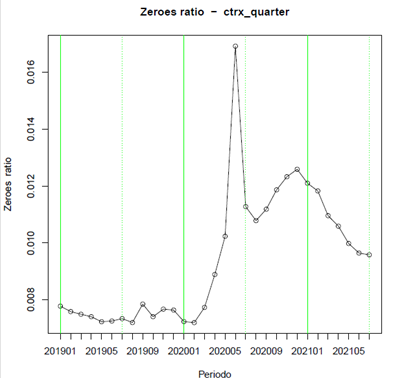

Al ser una variable tan importante, le hago una transformación con la media móvil de 6 períodos para ver la tendencia

In [32]:
%%sql
ALTER TABLE competencia_02
ADD COLUMN avg_6_ctrx_quarter DECIMILA(18, 2);

RuntimeError: If using snippets, you may pass the --with argument explicitly.
For more details please refer: https://jupysql.ploomber.io/en/latest/compose.html#with-argument


Original error message from DB driver:
(duckdb.duckdb.CatalogException) Catalog Error: Type with name DECIMILA does not exist!
Did you mean "decimal"?
[SQL: ALTER TABLE competencia_02
ADD COLUMN avg_6_ctrx_quarter DECIMILA(18, 2);]
(Background on this error at: https://sqlalche.me/e/20/f405)

If you need help solving this issue, send us a message: https://ploomber.io/community


In [ ]:
%%sql
UPDATE competencia_02
SET
    avg_6_ctrx_quarter = avg(ctrx_quarter) over (partition by numero_de_cliente
                            order by foto_mes
                            rows between 6 preceding and current row)

In [31]:
%%sql
select
  numero_de_cliente
  , foto_mes
  , ctrx_quarter
  , avg(ctrx_quarter) over (partition by numero_de_cliente
                            order by foto_mes
                            rows between 6 preceding and current row) as avg_6_ctrx_quarter
from competencia_02
limit 10

,numero_de_cliente,foto_mes,ctrx_quarter,avg_6_ctrx_quarter
0,29188883,201901,43,43.000000
1,29188883,201902,45,44.000000
2,29188883,201903,39,42.333333
3,29188883,201904,38,41.250000
4,29188883,201905,39,40.800000
5,29188883,201906,41,40.833333
6,29188883,201907,34,39.857143
7,29188883,201908,30,38.000000
8,29188883,201909,25,35.142857
9,29188883,201910,30,33.857143


In [ ]:
#Elimino la variable original ctrx_quarter
%%sql
ALTER TABLE competencia_02
DROP COLUMN ctrx_quarter

##	mcaja_ahorro	--	Monto total de la caja de ahorro del Paquete Premium

Acá se puede hacer: mcaja_ahorro + mcuenta_corriente + mplazo_fijo + minversiones1 + minversiones2  + mcaja_ahorro_adicional + mcaja_ahorro_dolares + mcuenta_corriente_adicional + mcuentas_saldo + mcuenta_debitos_automaticos

In [ ]:
%%sql
SELECT
    foto_mes,
    mcaja_ahorro + mcuenta_corriente + mplazo_fijo + minversiones1 + minversiones2 +
    mcaja_ahorro_adicional + mcaja_ahorro_dolares + mcuenta_corriente_adicional +
    mcuentas_saldo + mcuenta_debitos_automaticos AS total_mcaja
INTO competencia_02_con_total
FROM competencia_02;

In [ ]:
### Eliminar las variables individuales de la tabla original:
%%sql
ALTER TABLE competencia_02
DROP COLUMN mcaja_ahorro,
DROP COLUMN mcuenta_corriente,
DROP COLUMN mplazo_fijo,
DROP COLUMN minversiones1,
DROP COLUMN minversiones2,
DROP COLUMN mcaja_ahorro_adicional,
DROP COLUMN mcaja_ahorro_dolares,
DROP COLUMN mcuenta_corriente_adicional,
DROP COLUMN mcuentas_saldo,
DROP COLUMN mcuenta_debitos_automaticos;

In [ ]:
%%sql
select
  numero_de_cliente
  , foto_mes
  , total_mcaja
  , avg(total_mcaja) over (partition by numero_de_cliente
                            order by foto_mes
                            rows between 6 preceding and current row) as avg_6_total_mcaja
from competencia_02
limit 10

In [ ]:
#Elimino la variable original total_mcaja
%%sql
ALTER TABLE competencia_02
DROP COLUMN ctrx_quarter

# Guardar el csv con las variables transformadas
%%sql
copy competencia_02 to '/content/competencia_02_clase7.csv.gz' (FORMAT CSV, HEADER)